In [1]:
import squarify

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline

# Let's make some treemaps and waffle charts 

In [3]:
df = pd.read_excel("globalterrorism.xlsx")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df_usa = df[df.country_txt == 'United States']
df_usa.shape

(2757, 135)

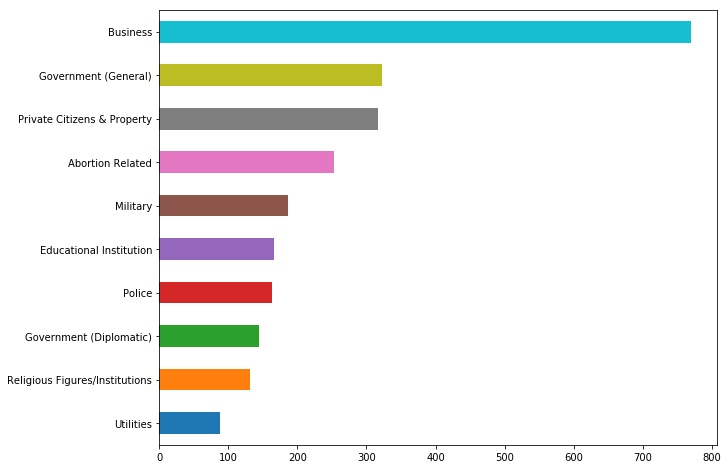

In [6]:
df_usa.targtype1_txt.value_counts().head(10).sort_values(ascending=True).plot(kind='barh',figsize=(10,8))

In [8]:
targets = df_usa.targtype1_txt.value_counts().head(10).reset_index()
targets

,index,targtype1_txt
0,Business,769
1,Government (General),323
2,Private Citizens & Property,317
3,Abortion Related,253
4,Military,186
5,Educational Institution,167
6,Police,164
7,Government (Diplomatic),144
8,Religious Figures/Institutions,132
9,Utilities,88


In [10]:
targets.targtype1_txt

0    769
1    323
2    317
3    253
4    186
5    167
6    164
7    144
8    132
9     88
Name: targtype1_txt, dtype: int64

**Let's plot the target types of attacks in the US in a treemap.**

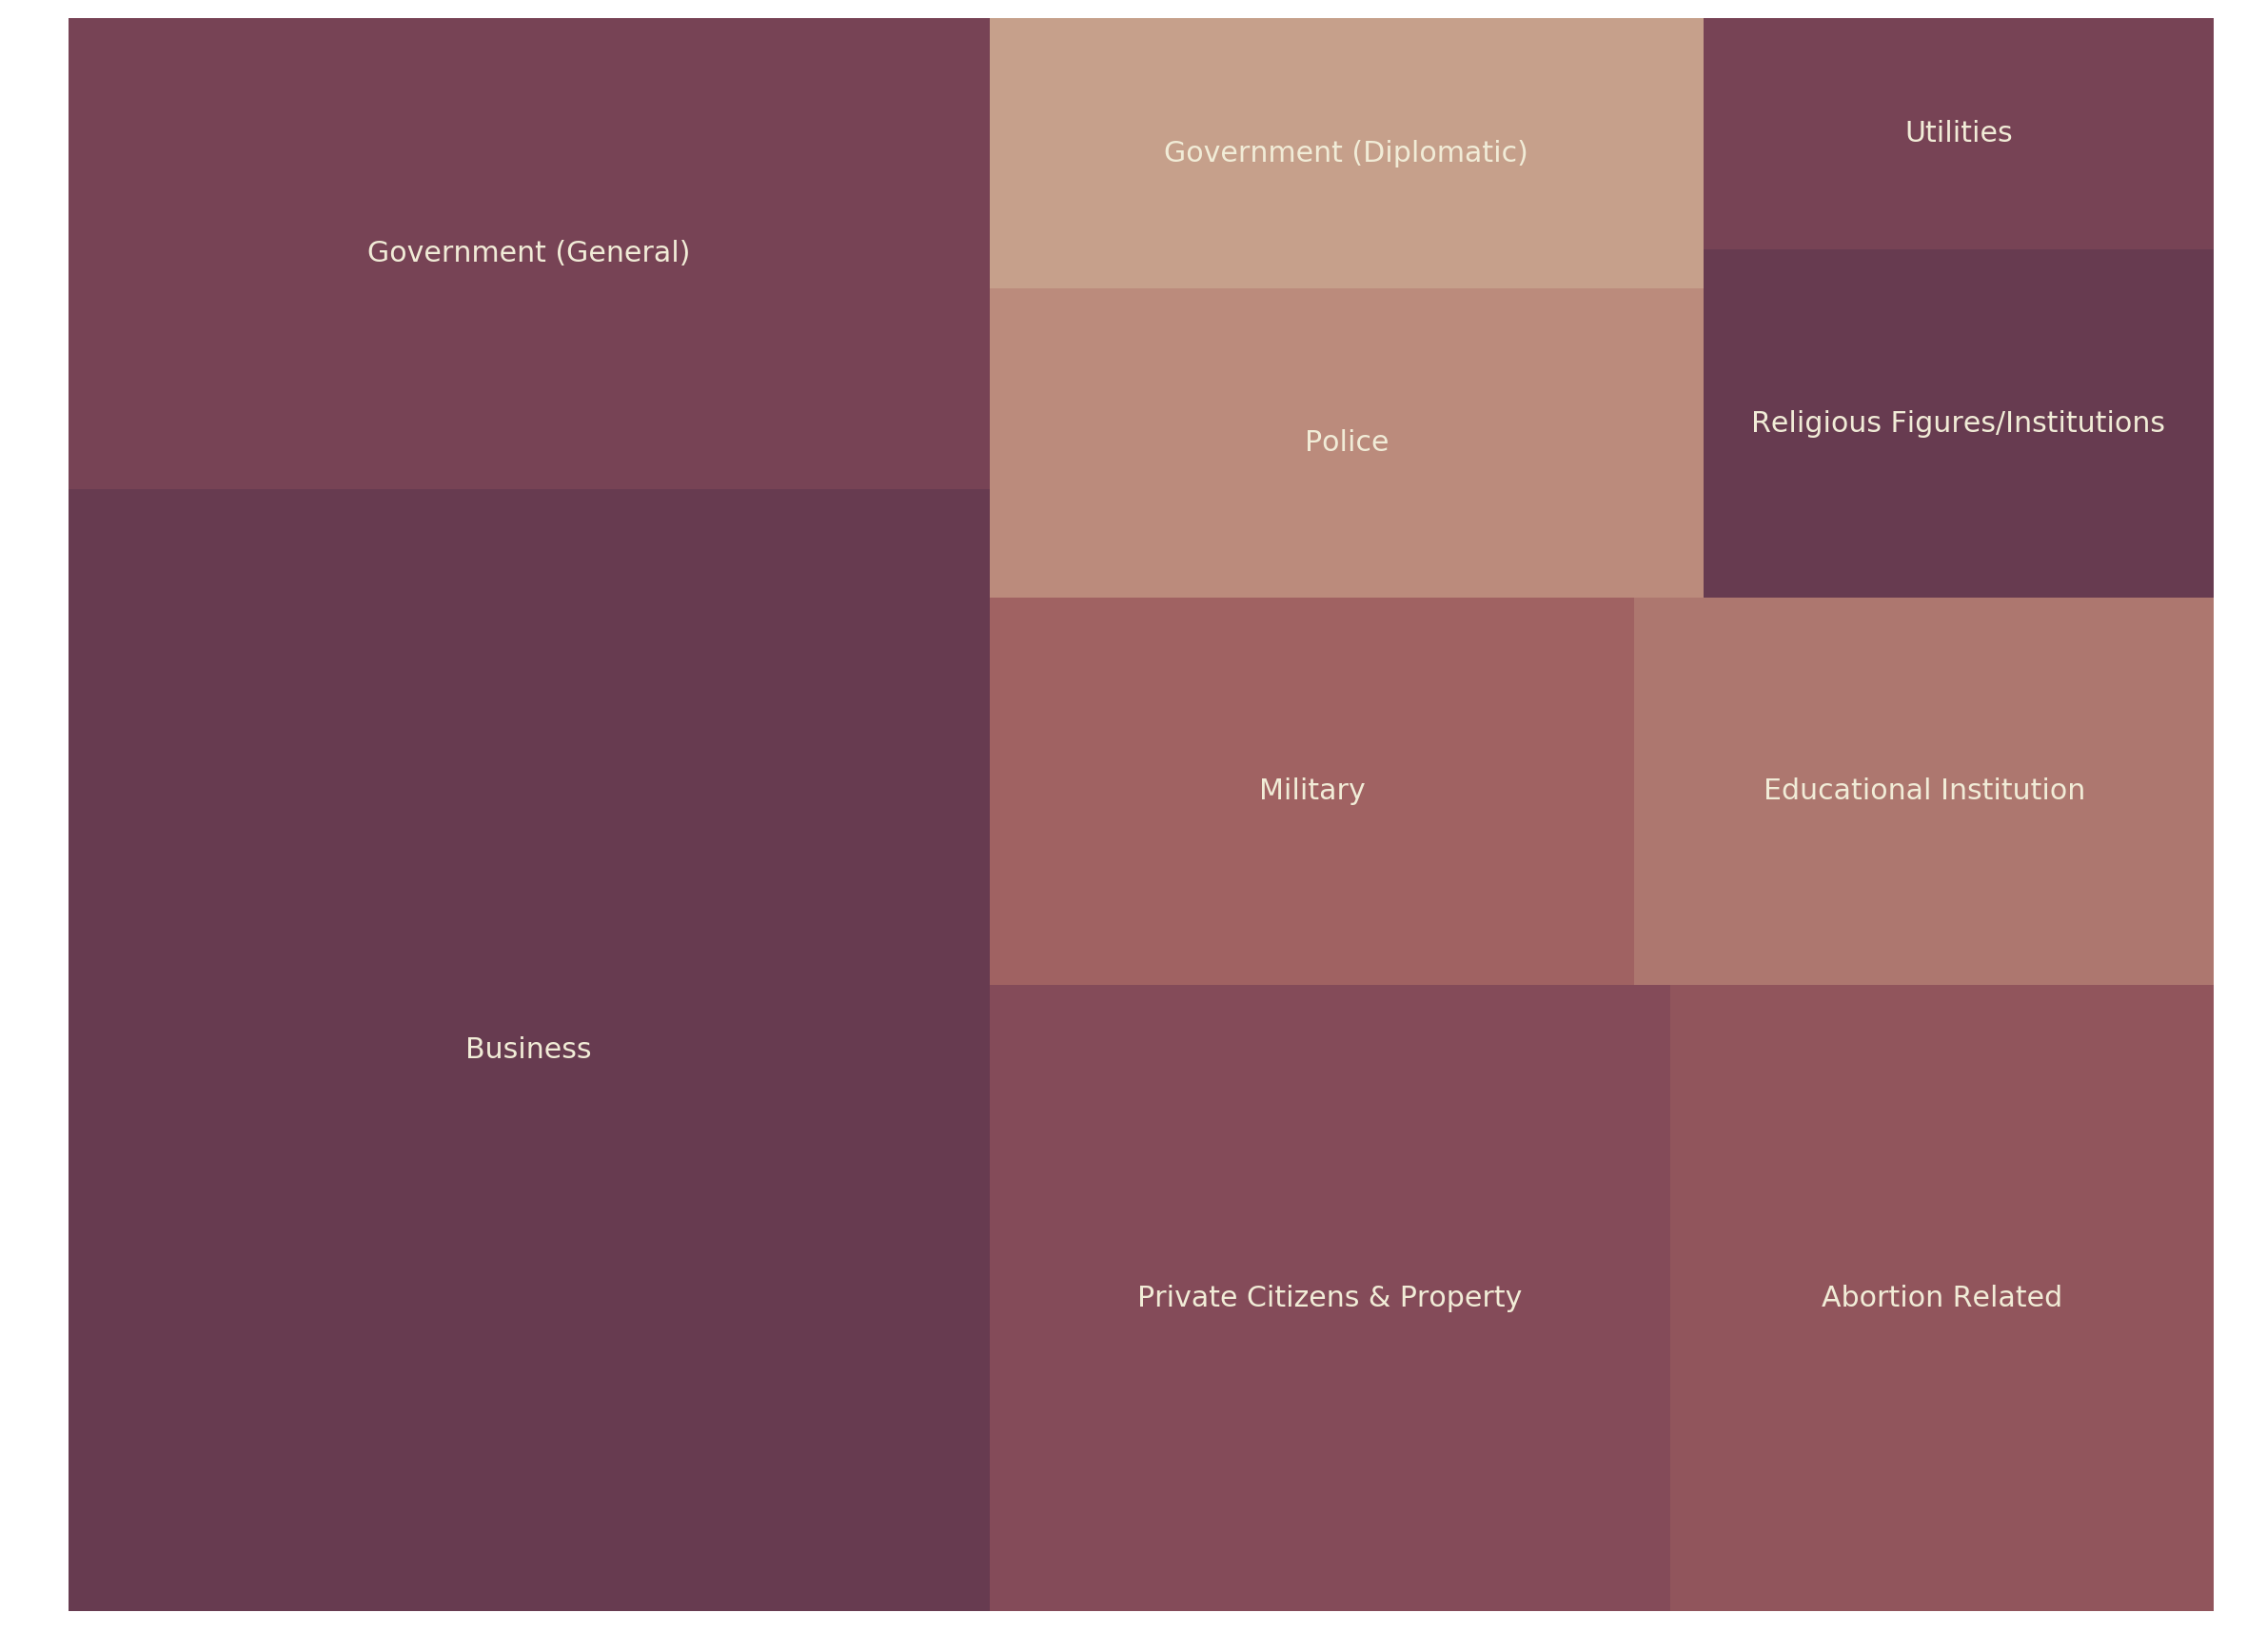

<Figure size 2908.8x2217.6 with 0 Axes>

In [79]:
df = pd.DataFrame({'targtype1_txt':[769,323,317,253,186,167,164,144,132,88], 'index':["Business", "Government (General)", "Private Citizens & Property", "Abortion Related", "Military", "Educational Institution", "Police", "Government (Diplomatic)", "Religious Figures/Institutions", "Utilities"]})
ax = squarify.plot(sizes=df['targtype1_txt'], label=df['index'], alpha=.8, color=["#420B25", "#55142B", "#661F30", "#762B34", "#893B3B", "#99554C", "#AA6E5C", "#B8896F"])
plt.axis('off')
plt.show()

ax.set_title('Most targeted groups by terrorist attacks')
ax.title.set_fontsize(50)
ax.title.set_fontname('Franklin Gothic Heavy')

plt.rcParams.update({
    'figure.figsize': (40.4, 30.8),
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 30,
    'text.color': '#F1ECD7'
})
    

#plt.savefig("targeted-groups.pdf")

**Now let's plot the success of the attacks.**

In [80]:
success = df_usa.success.value_counts().reset_index()
success

,index,success
0,1,2273
1,0,484


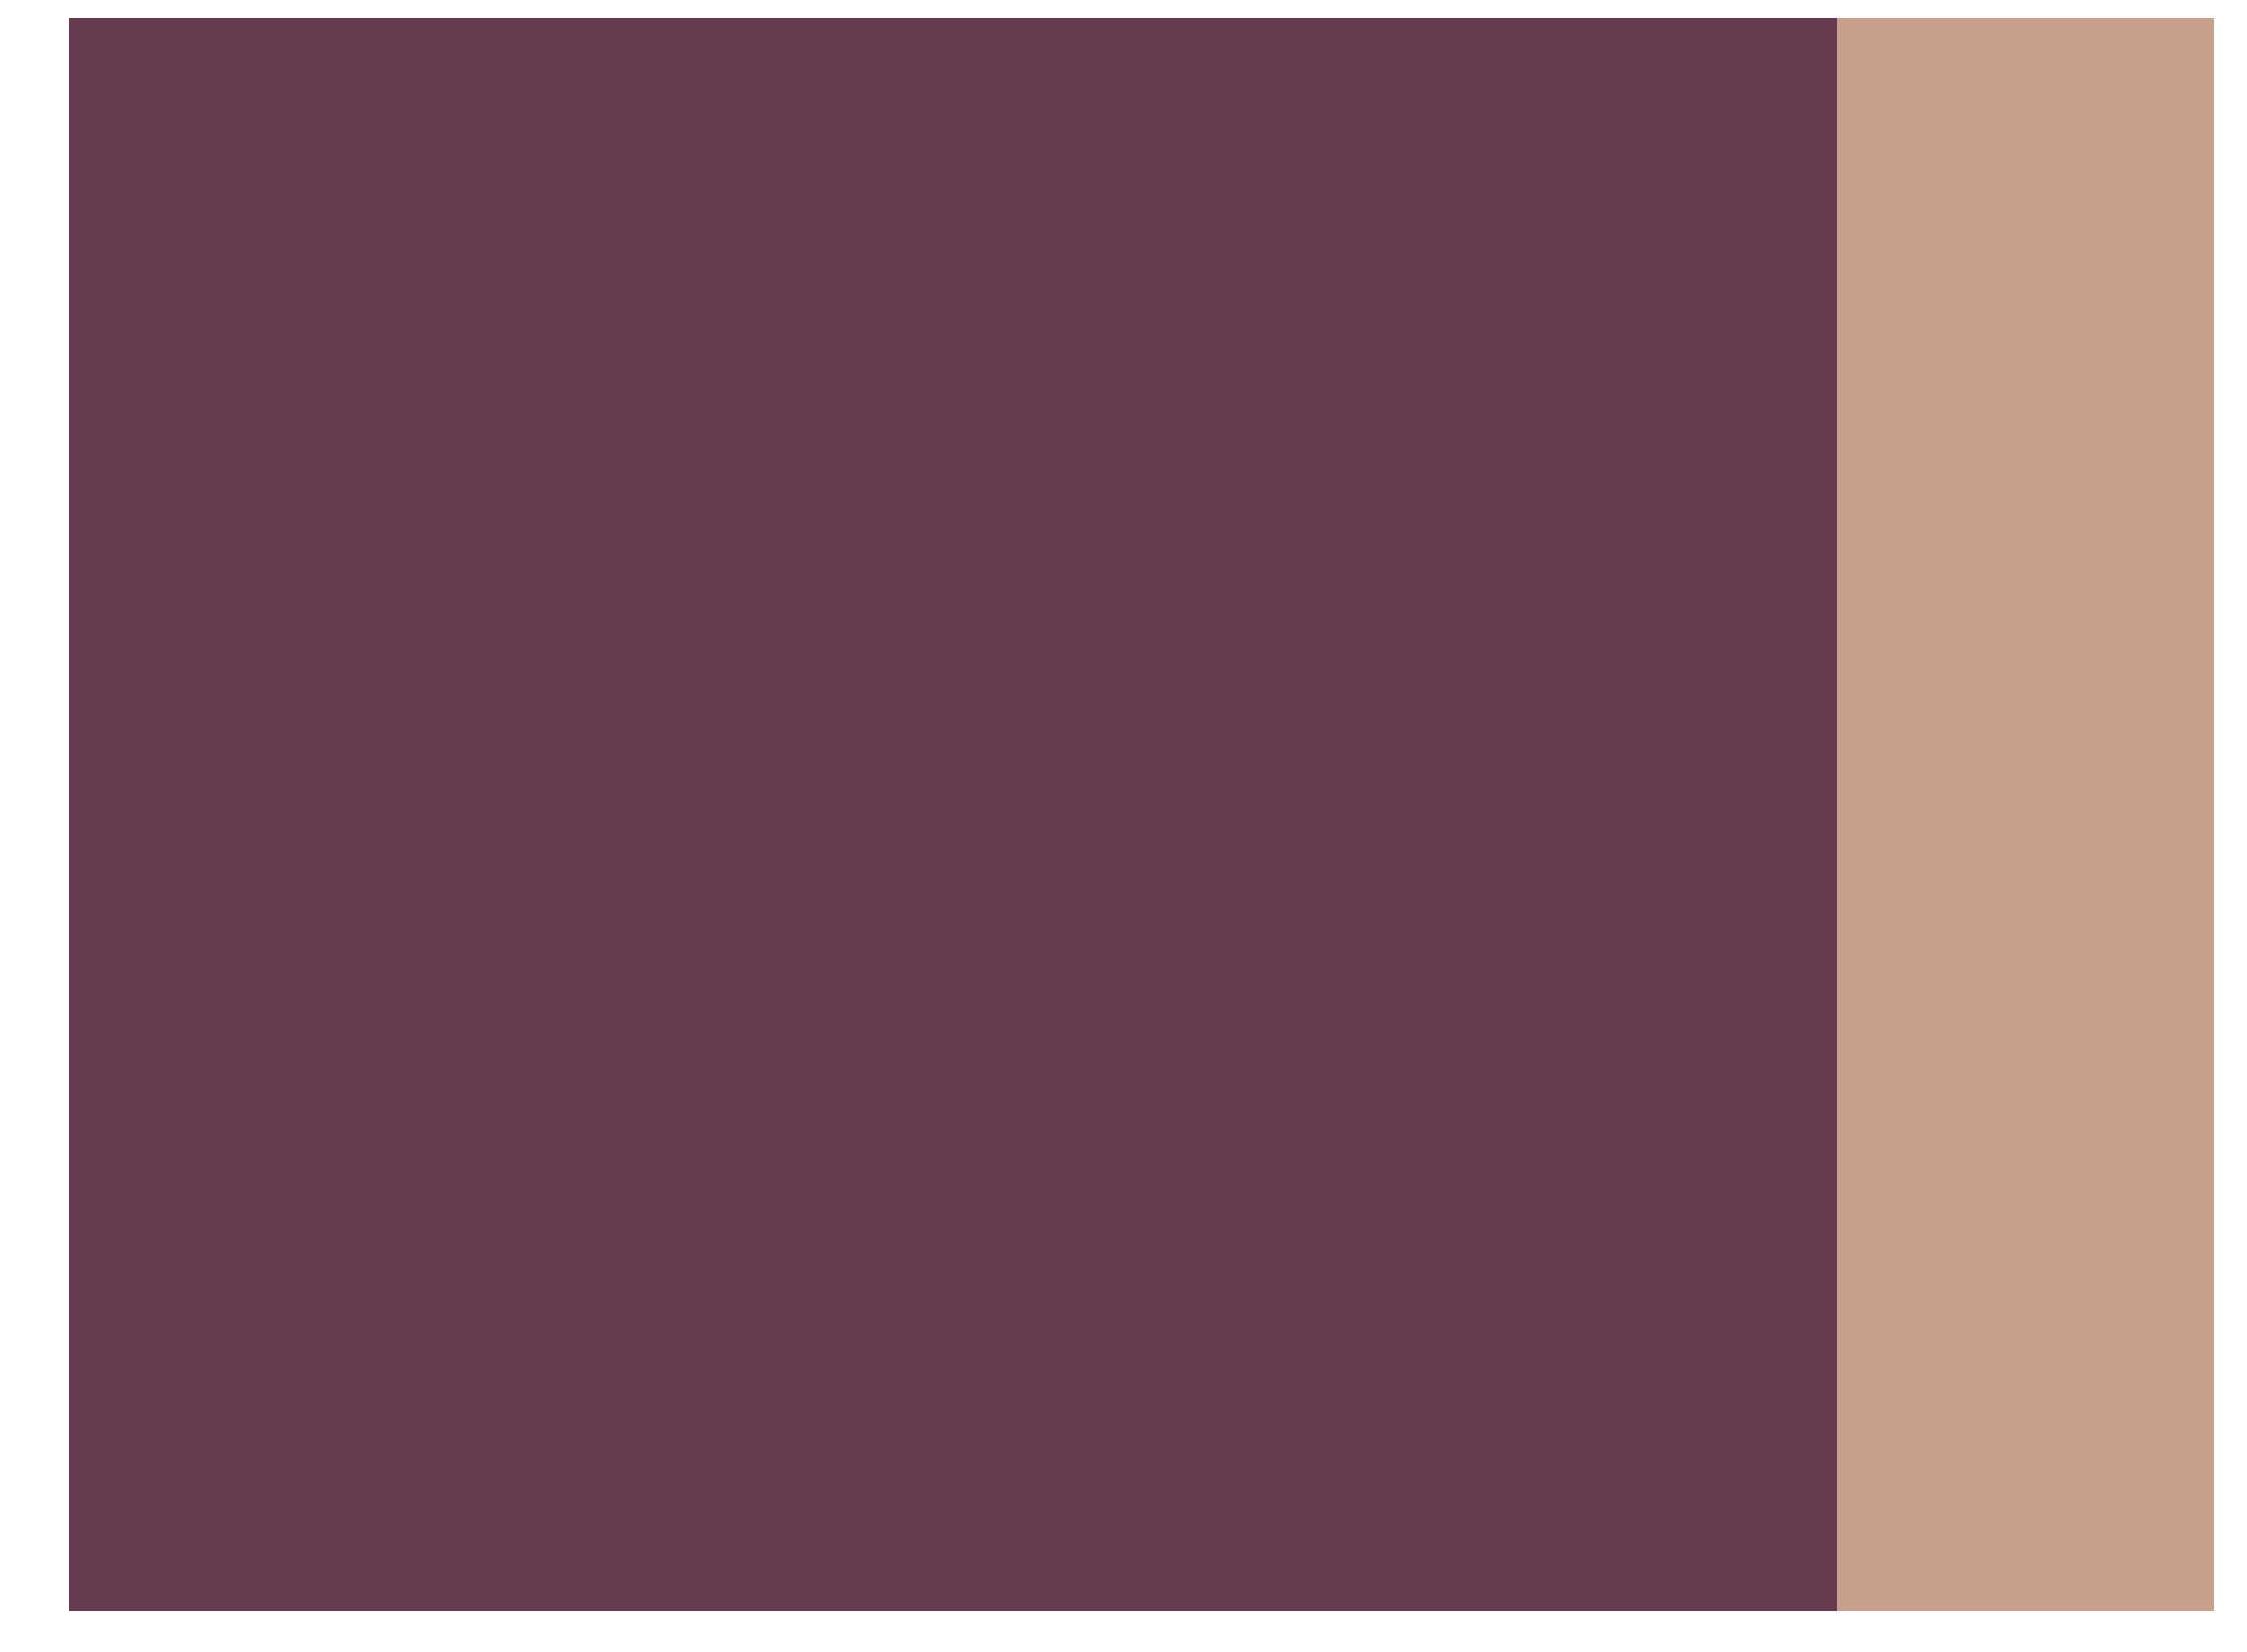

<Figure size 2908.8x2217.6 with 0 Axes>

In [75]:
df = pd.DataFrame({'success':[2273, 484], 'index':["", ""]})
ax = squarify.plot(sizes=df['success'], label=df['index'], alpha=.8, color=["#420B25", "#B8896F"])
plt.axis('off')
plt.show()

ax.grid(True, axis='x', color='black', linestyle='-', linewidth=0.5)


plt.rcParams.update({
    'figure.figsize': (40.4, 30.8),
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 30,
    'text.color': '#F1ECD7',
    'axes.grid': True
})

#plt.savefig("success.pdf")

**Actually, I discovered this library that allows me to make cool waffle charts.**

Let's test it out.

In [81]:
from pywaffle import Waffle

In [85]:
df = pd.DataFrame({
    'success': ['unsuccessful', 'successful'],
    'number_of_attacks': [484, 2272]
})
df

,success,number_of_attacks
0,unsuccessful,484
1,successful,2272


c:\users\júlia ledur\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


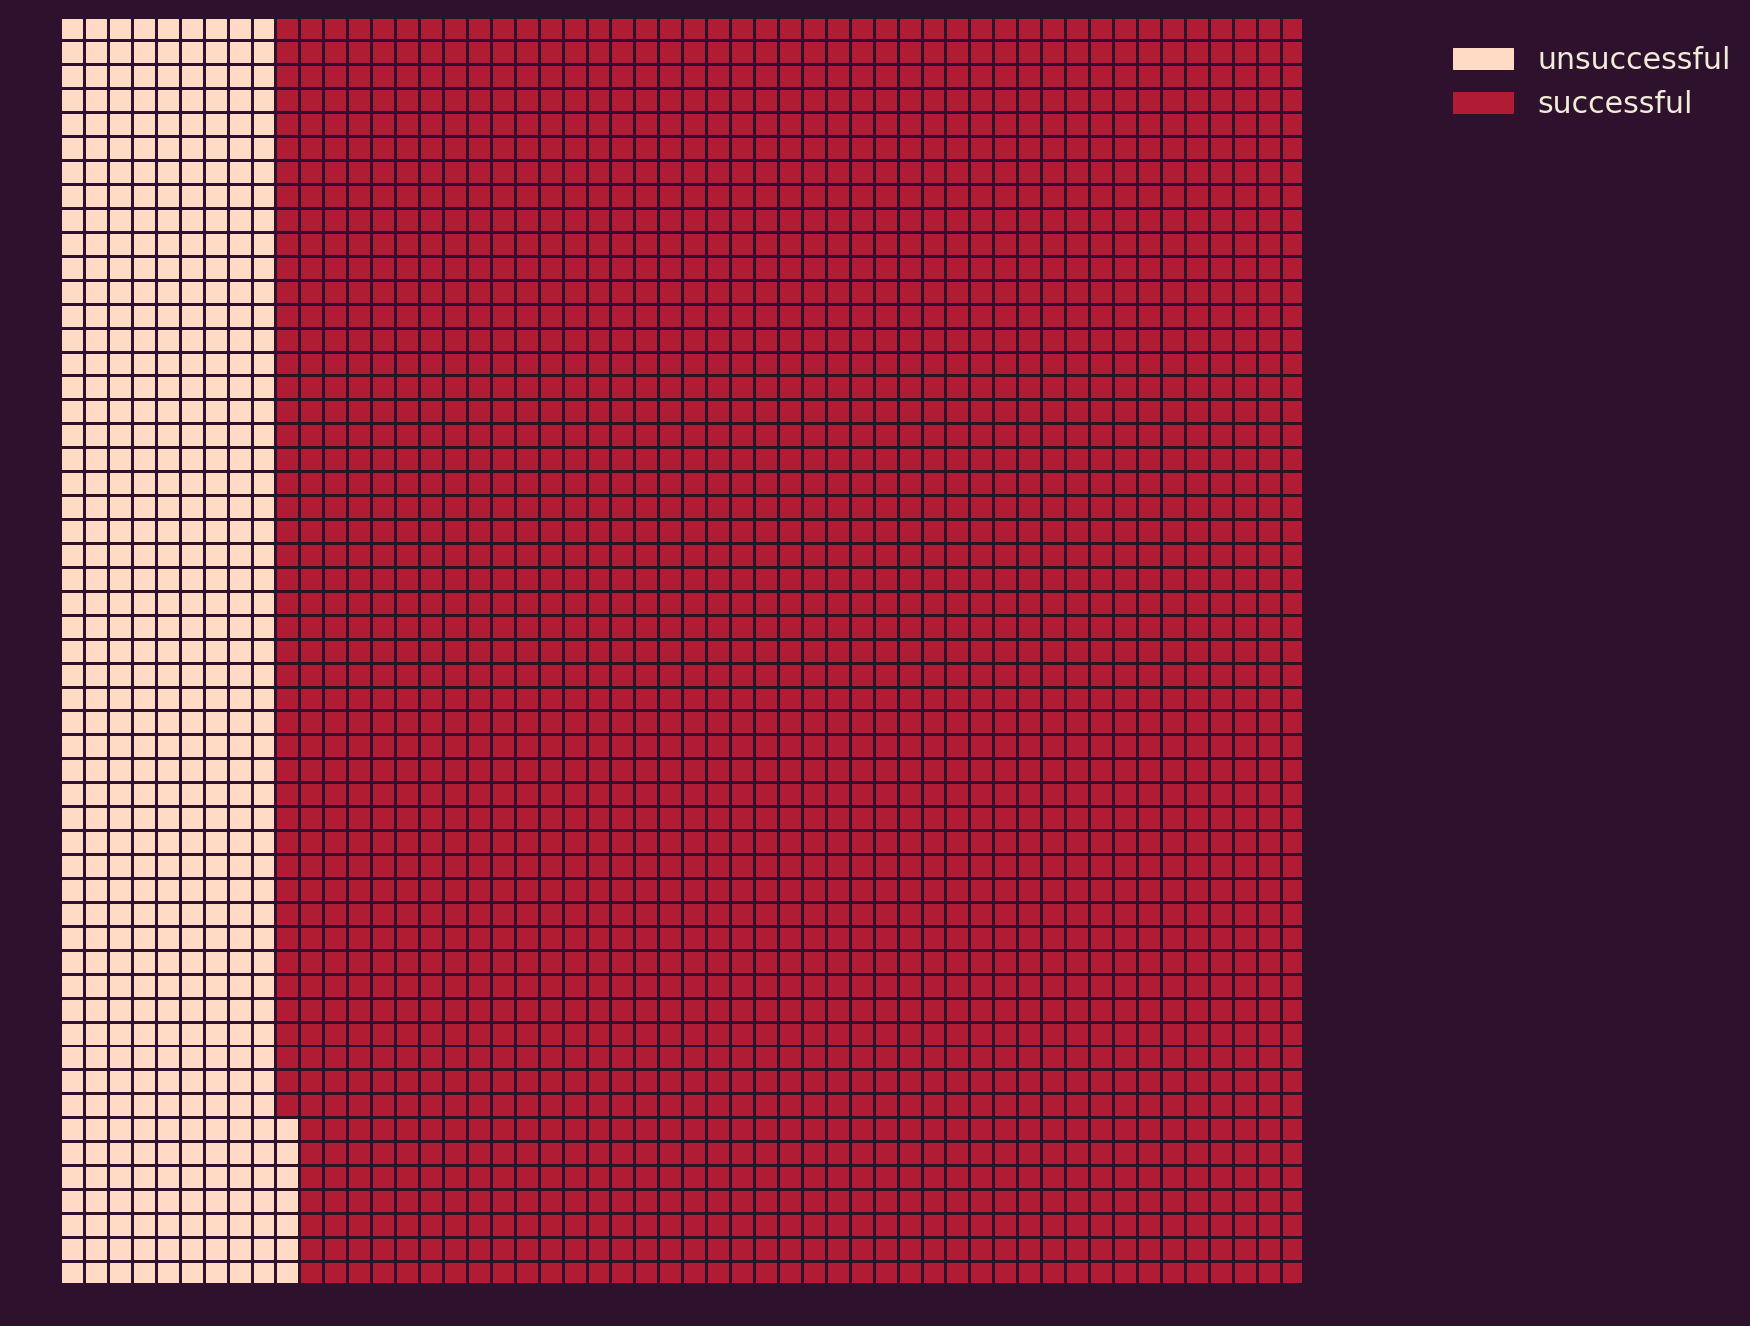

In [95]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=53,
    values=df.number_of_attacks,
    labels=list(df.success),
    figsize=(25, 25),
    colors=("#ffdbc5", "#b01c33"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'framealpha': 0}
)

fig.gca().set_facecolor('#2e112d')
fig.set_facecolor('#2e112d')

#plt.savefig("attacks-success.pdf")

In [98]:
df_nyc = df_usa[df_usa.city == 'New York City']

df_nyc.nkill.value_counts()

# 352 attacks were successful 

0.0       405
1.0        23
2.0         6
4.0         2
1382.0      1
11.0        1
Name: nkill, dtype: int64

In [99]:
df_fatalities = pd.DataFrame({
    'fatalities': ['no', 'yes'],
    'number_of_attacks': [405, 33]
})
df_fatalities

,fatalities,number_of_attacks
0,no,405
1,yes,33


c:\users\júlia ledur\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


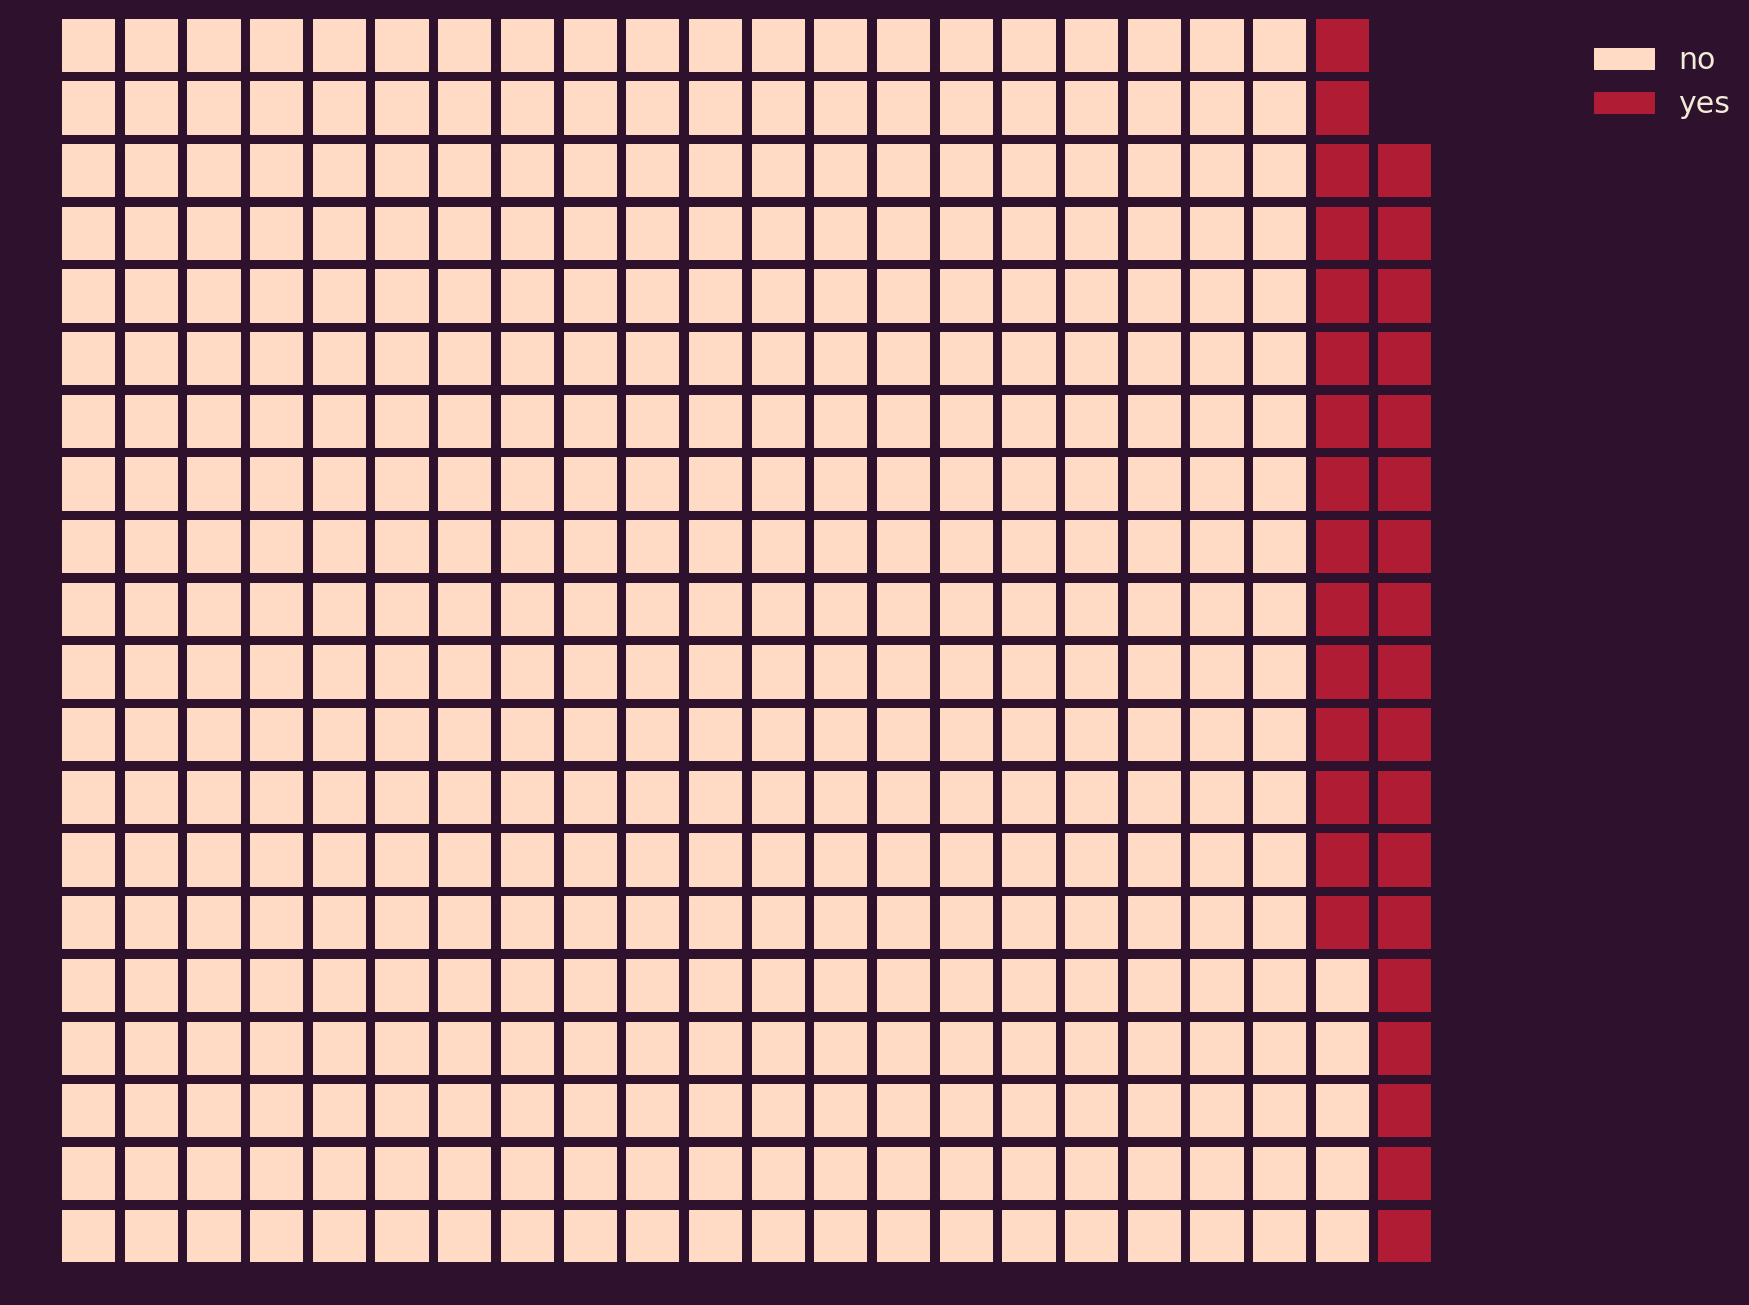

In [104]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=20,
    values=df_fatalities.number_of_attacks,
    labels=list(df_fatalities.fatalities),
    figsize=(25, 25),
    colors=("#ffdbc5", "#b01c33"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'framealpha': 0}
)

fig.gca().set_facecolor('#2e112d')
fig.set_facecolor('#2e112d')

#plt.savefig("nyc-attacks-fatalities.pdf")